<a href="https://colab.research.google.com/github/SHUBHR1005/CODSOFT-PROJECTS/blob/main/IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IRIS DATASET

---

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

* Id
* Sepal Length (Cm)
* Sepal Width (Cm)
* Petal Length (Cm)
* Petal Width (Cm)
*   Species

## LIBRARIES

---



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,recall_score,f1_score

## DATA

---



In [13]:
data = pd.read_csv("/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## DATA DESCRIPTION AND INFORMATION

---



In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## EXPLORATORY DATA ANALYSIS

---



### 1. PAIRWISE PLOT

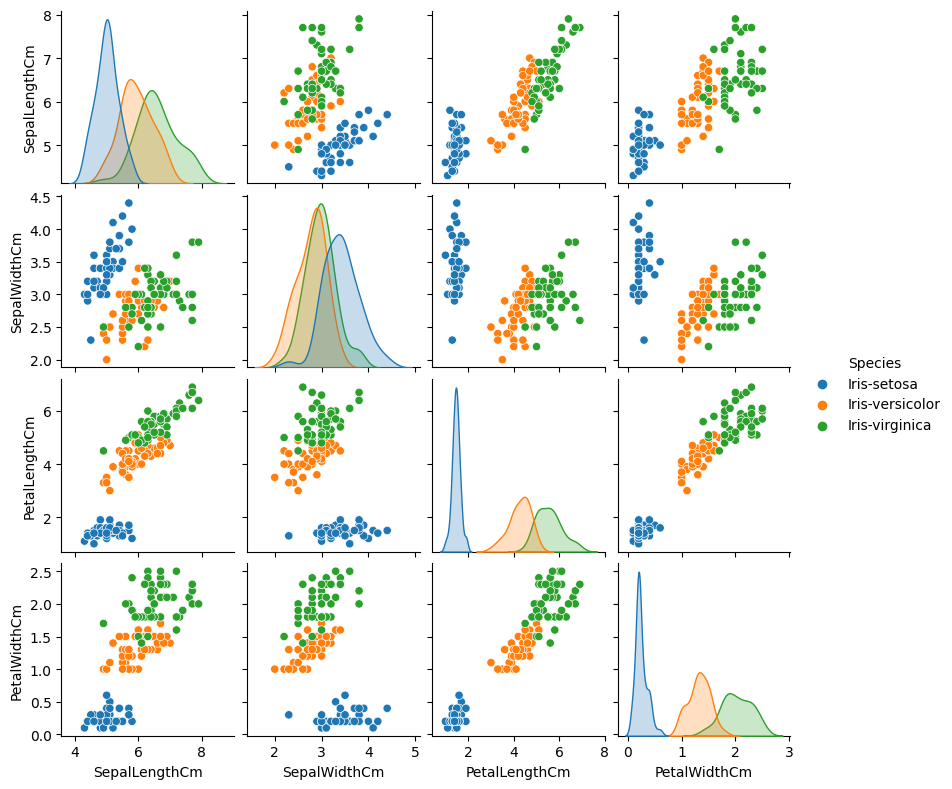

In [ ]:
sns.pairplot(data[data.columns[1:]], hue ='Species', height=2)
plt.show()

 INTERPRETATION

---



* The distribution of Sepal Length of Setosa is more leptourtic as compared to that of Versicolor and Virginica. The distribution of Sepal Length of Versicolor and Virginica has almost similar scale but they differ in location.

* The distribution of Sepal Width of Versicolor is almost similar to that of Virginica. The distribution of Sepal Widthh of Setosa differ slightly in location and scale.

* The distribution of Petall Length of Setosa is more leptourtic as compared to that of Versicolor and Virginica. The distribution of Petal Length of Versicolor and Virginica has almost similar scale but they differ in location.

* The distribution of Petal Width of Setosa is more leptourtic as compared to that of Versicolor and Virginica. The distribution of Petal Width of Versicolor and Virginica has almost similar scale, although for Virginica the distribution is slightly platykurtic and they also differ in location.

From the Pairwise plot it is evident that Petal Length and Petal Width clearly helps us to differntiate between different Iris species.

### VIOLIN PLOTS: CHECKING OUTLIERS

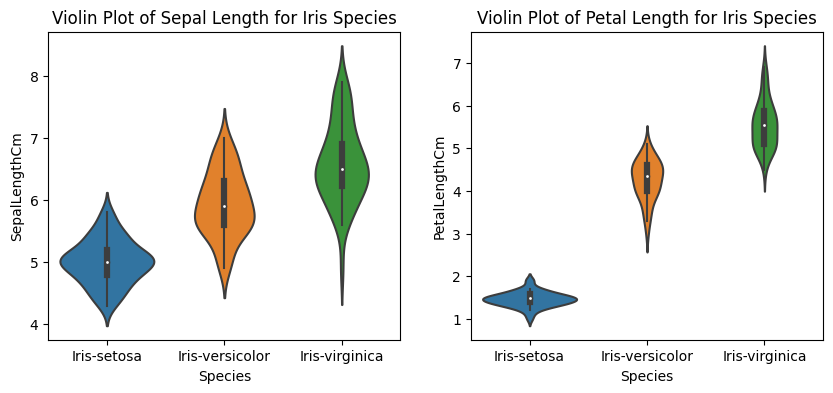

In [ ]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Create the violin plot for Petal Length
sns.violinplot(x='Species', y='SepalLengthCm', data=data, ax=axes[0])
axes[0].set_title('Violin Plot of Sepal Length for Iris Species')

# Create the violin plot for Sepal Length
sns.violinplot(x='Species', y='PetalLengthCm', data=data, ax=axes[1])
axes[1].set_title('Violin Plot of Petal Length for Iris Species')

# Show the plots
plt.show()

* MEDIANS:

---
1. SETOSA
> SEPAL LENGTH : ~5 CM \
> PETAL LENGTH : ~1.5 CM
2. VERSICOLOR
> SEPAL LENGTH : ~5.9 CM \
> PETAL LENGTH : ~4.5 CM
3. VIRGINICA
> SEPAL LENGTH : ~6.5 CM \
> PETAL LENGTH : ~5.5 CM

* INTERQUARTILE RANGE:

---
1. SETOSA
> SEPAL LENGTH : ~[4.9,5.1] CM \
> PETAL LENGTH : ~[1.4,1.6] CM
2. VERSICOLOR
> SEPAL LENGTH : ~[5.5,6.5] CM \
> PETAL LENGTH : ~[4.2,4.8] CM
3. VIRGINICA
> SEPAL LENGTH : ~[6.2,7.0] CM \
> PETAL LENGTH : ~[5,6] CM




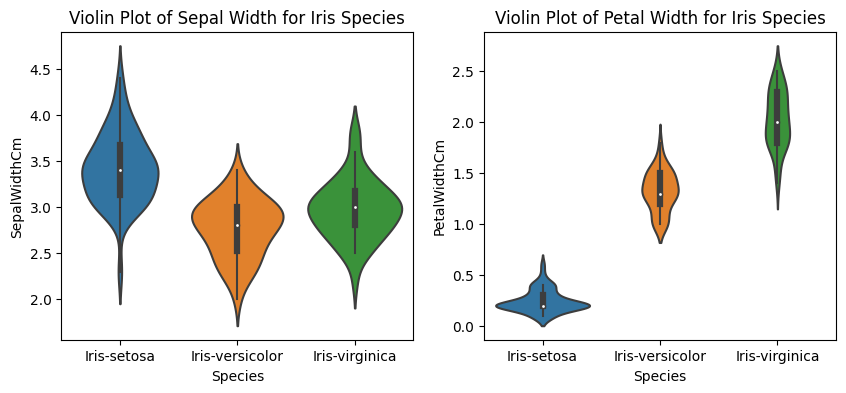

In [ ]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Create the violin plot for Petal Length
sns.violinplot(x='Species', y='SepalWidthCm', data=data, ax=axes[0])
axes[0].set_title('Violin Plot of Sepal Width for Iris Species')

# Create the violin plot for Sepal Length
sns.violinplot(x='Species', y='PetalWidthCm', data=data, ax=axes[1])
axes[1].set_title('Violin Plot of Petal Width for Iris Species')

# Show the plots
plt.show()

 * MEDIANS:

---
1. SETOSA
> SEPAL WIDTH : ~3.4 CM \
> PETAL WIDTH : ~0.2 CM
2. VERSICOLOR
> SEPAL WIDTH : ~2.8 CM \
> PETAL WIDTH : ~1.3 CM
3. VIRGINICA
> SEPAL WIDTH : ~3.1 CM \
> PETAL WIDTH : ~2 CM

* INTERQUARTILE RANGE:

---
1. SETOSA
> SEPAL WIDTH : ~[3.2,3.6] CM \
> PETAL WIDTH : ~[0.2,0.4] CM
2. VERSICOLOR
> SEPAL WIDTH: ~[2.5,3.1] CM \
> PETAL WIDTH : ~[1.4,1.6] CM
3. VIRGINICA
> SEPAL WIDTH : ~[2.7,3.3] CM \
> PETAL WIDTH : ~[1.6,2.4] CM



### CORRELATION PLOT

Text(0.5, 1.0, 'Correlation Plot')

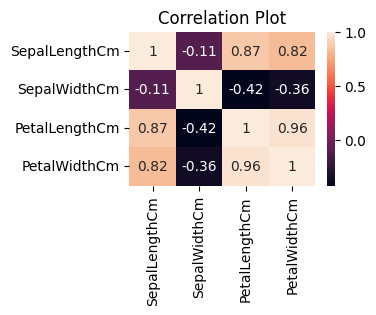

In [ ]:
df = data.drop(['Id','Species'],axis=1)
fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Plot')

> MULTICOLINEARITY IS NOT PRESENT SO KEEP ALL THE FEATURE VARIABLES IN THE MODEL.

## TRAIN TEST SPLIT

---
We now split our dataset into training and testing sets. We perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 80% of the data in your train dataset and the rest 20% in your test dataset.


In [4]:
X = data.iloc[:, 1:5]
y = data['Species']
# Convert the target variable to numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (120, 4) (120,)
Testing set shape: (30, 4) (30,)


## MODEL : XG BOOST

---

XGBoost (Extreme Gradient Boosting) is a powerful machine learning algorithm known for its efficiency and accuracy. XGBoost builds an ensemble of decision trees, optimizing loss functions and incorporating regularization to classify the Iris flowers into three species with high accuracy and generalization capability.

Accuracy: 1.0
Confusion Matrix:


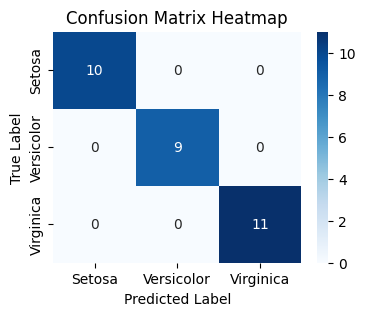

In [7]:
# Define hyperparameters for XGBoost
params = {
    'objective': 'multi:softmax',  # 'multi:softmax' for multiclass classification
    'num_class': 3,  # Number of classes in the target variable
    'max_depth': 3,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds (trees)
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test set
y_pred = model.predict(dtest)

# Convert the predicted labels to integers
y_pred = y_pred.astype(int)

# Convert the numerical labels back to the original class names
y_pred_class_names = label_encoder.inverse_transform(y_pred)
y_test_class_names = label_encoder.inverse_transform(y_test)

# Calculate accuracy, precision, recall,f1 score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
labels = ['Setosa', 'Versicolor', 'Virginica']
print("Confusion Matrix:")
fig,ax = plt.subplots(figsize=(4,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [8]:
# Generate a classification report
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(class_report)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



**INTERPRETATION**

---

* Precision: The percentage of correct positive predictions out of all positive predictions for each class. All three classes (Iris-setosa, Iris-versicolor, and Iris-virginica) have precision values of 1.00, indicating perfect positive predictions.

* Recall: The percentage of true positive predictions out of all actual positive instances for each class. All three classes have recall values of 1.00, indicating that all positive instances of each class were correctly predicted.

* F1-score: The harmonic mean of precision and recall, providing a balanced measure of a model's performance. For all three classes, the F1-score is 1.00, indicating excellent performance.

* Support: The number of instances for each class in the test dataset.

* Accuracy: The overall percentage of correctly predicted instances out of all instances (for all classes). The model achieved an accuracy of 1.00 (100%), indicating perfect overall performance.

* Macro Avg: The average of precision, recall, and F1-score across all classes, giving equal weight to each class. The macro average is also 1.00, reflecting high overall performance.

* Weighted Avg: The weighted average of precision, recall, and F1-score, taking into account the number of instances for each class. The weighted average is 1.00, which shows excellent overall model performance.

Overall, the model achieved perfect precision, recall, and F1-score for all classes and an accuracy of 1.00, indicating it performed exceptionally well on the Iris dataset.

### FEATURE IMPORTANCE

---



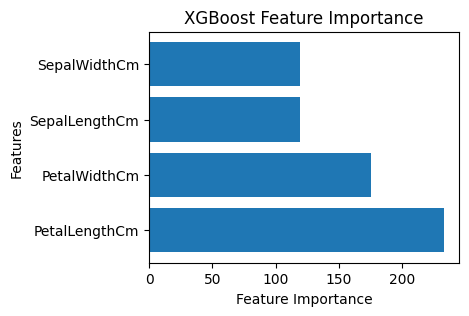

In [ ]:
importance = model.get_score(importance_type='weight')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
sorted_features, importance_values = zip(*sorted_importance)
fig,ax = plt.subplots(figsize=(4,3))
plt.barh(range(len(sorted_features)), importance_values, align='center')
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.show()

**Interpretation of the result:**

---


The bar chart shows the feature importance values for each feature in descending order. The higher the importance value, the more influential the feature is in making predictions with the XGBoost model.